# Heart Attack Analysis Using Different Machine Learning Models


## Problem Statement
* Deriving insights from Heart Attack dataset and training with different Machine Learning Models

* A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

* This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using different Machine Learning models and findout which algorithm suitable for this dataset.




## <font color='5499C7'>Data </font> 



#### <font color='5499C7'>data files </font> 



- Heart.csv 
- o2Saturation.csv

####  <font color='5499C7'>Description of the Fields </font> 


- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attackn

## <font color='5499C7'>import Libraries </font> 



In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## <font color='5499C7'>EDA</font> 



In [5]:
# read the 2 csv files

heart = pd.read_csv('heart.csv')
o2Saturation = pd.read_csv ('o2Saturation.csv')

In [6]:
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
o2Saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [8]:
# Merging both files

df = pd.merge (heart,o2Saturation ,left_index=True, right_index=True)

In [9]:
#Getting info about the data columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  98.6      303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 37.9 KB


In [10]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6


In [11]:
#Renaming the columns for clarity

df.rename(columns = {'cp':'ChestPaintype', 'trtbps':'RestingBloodPressure', 'fbs':'FastingBloodSugar', 'thalachh':'MaxHeartRate', 
                     'exng':'ExInducedAngina', 'slp':'slope', 'caa':'MajorVessels', 'thall':'ThaliumStressResult'
                     , '98.6':'o2Saturation'}, inplace = True)

In [12]:
df.head()

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [13]:
# check for null variables
#df.isna().sum()

df.isnull().sum()

age                     0
sex                     0
ChestPaintype           0
RestingBloodPressure    0
chol                    0
FastingBloodSugar       0
restecg                 0
MaxHeartRate            0
ExInducedAngina         0
oldpeak                 0
slope                   0
MajorVessels            0
ThaliumStressResult     0
output                  0
o2Saturation            0
dtype: int64

In [14]:
#Checking for duplicated

df.duplicated().sum()

1

In [15]:
#Removing duplicated

df= df.drop_duplicates()

In [16]:
#to check the statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
ChestPaintype,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
RestingBloodPressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
FastingBloodSugar,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
MaxHeartRate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
ExInducedAngina,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


 ==>  min age is 29 when mean value is 45
 

In [17]:
#to check the unique values of the 'sex' column with their count

df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

##### => considering 1 for Male 0 for Female 

In [18]:
#to check the unique values of the 'ChestPaintype' column with their count

df['ChestPaintype'].value_counts()

0    143
2     86
1     50
3     23
Name: ChestPaintype, dtype: int64

In [19]:
df['FastingBloodSugar'].value_counts()


0    257
1     45
Name: FastingBloodSugar, dtype: int64

In [20]:
temp = df[df['FastingBloodSugar']==1]
temp['sex'].value_counts()

1    33
0    12
Name: sex, dtype: int64

In [21]:

df['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [22]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

In [23]:
# get number of unique values in each column

df.nunique()

age                      41
sex                       2
ChestPaintype             4
RestingBloodPressure     49
chol                    152
FastingBloodSugar         2
restecg                   3
MaxHeartRate             91
ExInducedAngina           2
oldpeak                  40
slope                     3
MajorVessels              5
ThaliumStressResult       4
output                    2
o2Saturation              7
dtype: int64

In [25]:
df.head(2)

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6


In [26]:
#Labelling the x and y axis

x = df.drop(columns='output')
y = df.output

In [27]:
# To import feature selection to increase the prediction power of the algorithms
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)

In [30]:
#to select the most critical variables and eliminate the redundant and irrelevant ones.

mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

MajorVessels            0.130976
ChestPaintype           0.122998
ThaliumStressResult     0.101706
oldpeak                 0.098970
slope                   0.089987
chol                    0.081441
MaxHeartRate            0.073121
ExInducedAngina         0.069452
o2Saturation            0.040963
age                     0.000000
sex                     0.000000
RestingBloodPressure    0.000000
FastingBloodSugar       0.000000
restecg                 0.000000
Name: MI Scores, dtype: float64

In [36]:
#defining the categorical and continuous variables

cat_cols = ['sex','ExInducedAngina','MajorVessels','ChestPaintype','FastingBloodSugar','restecg','slope','ThaliumStressResult']
num_col = ["age","RestingBloodPressure","chol","MaxHeartRate","oldpeak",'o2Saturation']
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", num_col)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'ExInducedAngina', 'MajorVessels', 'ChestPaintype', 'FastingBloodSugar', 'restecg', 'slope', 'ThaliumStressResult']
The continuous cols are :  ['age', 'RestingBloodPressure', 'chol', 'MaxHeartRate', 'oldpeak', 'o2Saturation']
The target variable is :   ['output']


In [31]:
df.head(3)

,age,sex,ChestPaintype,RestingBloodPressure,chol,FastingBloodSugar,restecg,MaxHeartRate,ExInducedAngina,oldpeak,slope,MajorVessels,ThaliumStressResult,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6


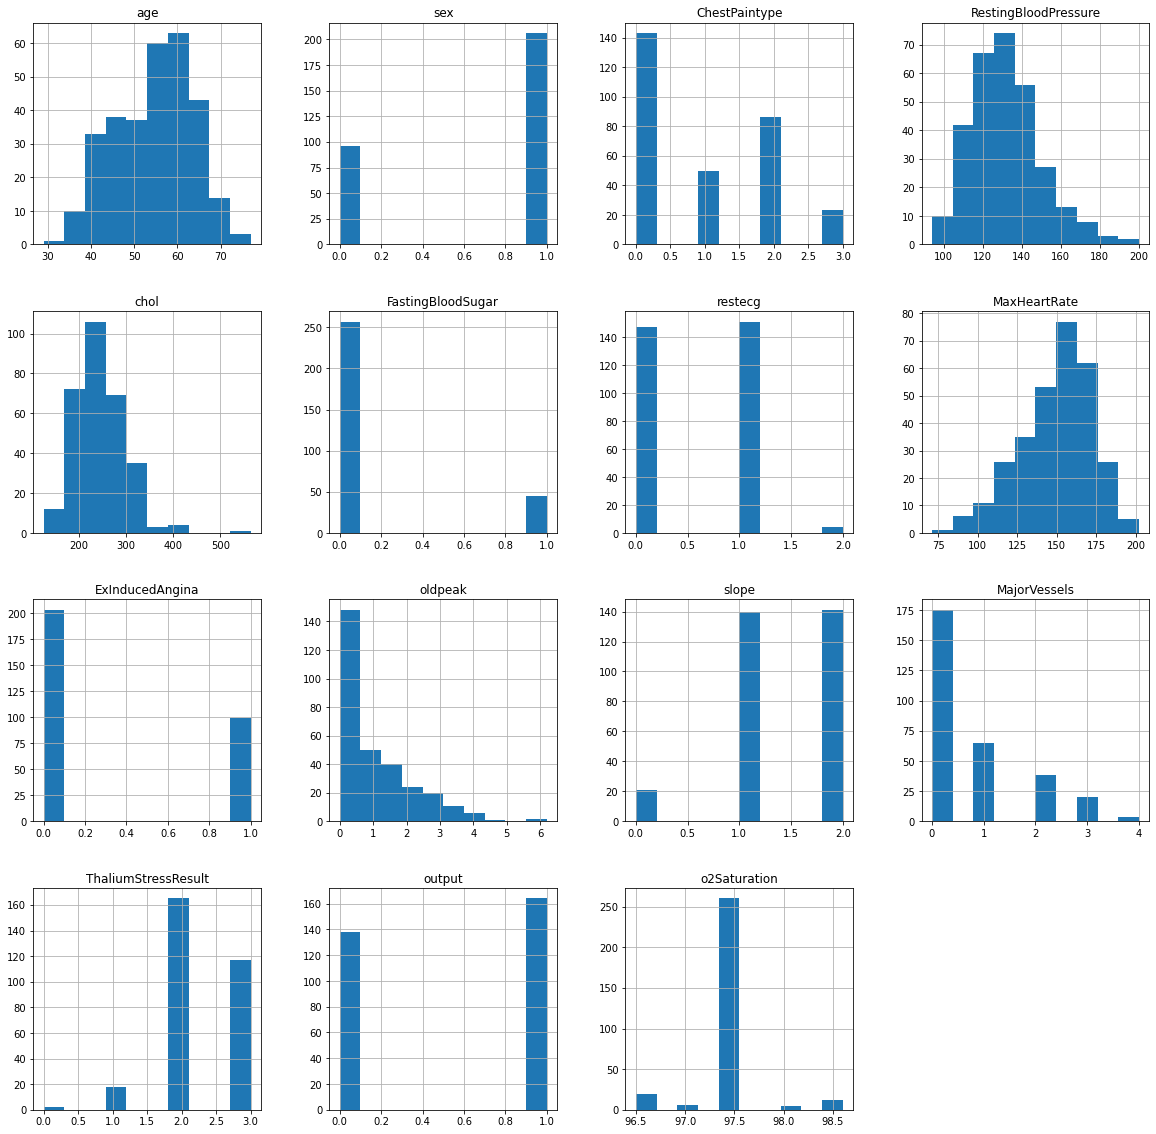

In [34]:
#to show the distribution in each column

df.hist(figsize=(20,20))
plt.show()

##### Detecting Outlier in continuous feature 

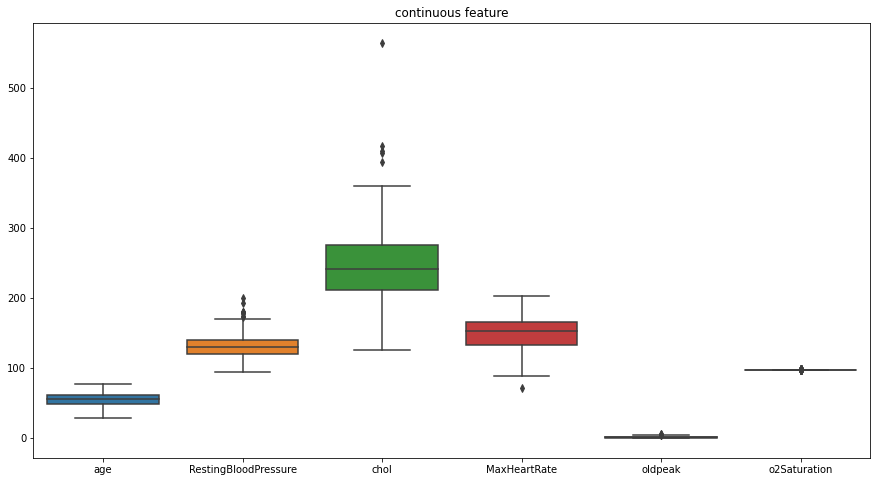

In [37]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df[num_col])
ax.set_title('continuous feature')
plt.show()

##### Correlation

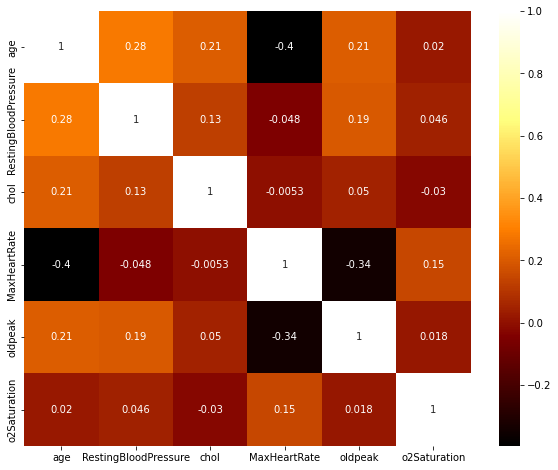

In [38]:

plt.figure(figsize=(10,8))
sns.heatmap(df[num_col].corr(), yticklabels='auto', annot=True, cmap=plt.cm.afmhot)
plt.show()

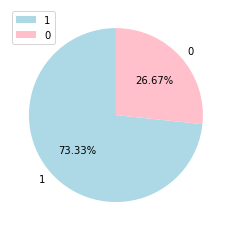

In [39]:
#to count and visualize male to female ratio in the 'sex' column

labels=temp['sex'].value_counts().index

plt.pie(temp['sex'].value_counts(),labels=labels,
        autopct='%1.2f%%',colors=['lightblue','pink'], startangle=90)
plt.legend();

Density distribution for Age

<Figure size 720x720 with 0 Axes>

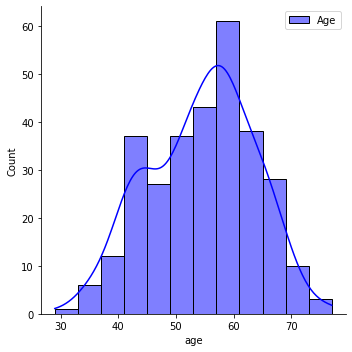

In [40]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="blue", label="Age", kde= True)
plt.legend()

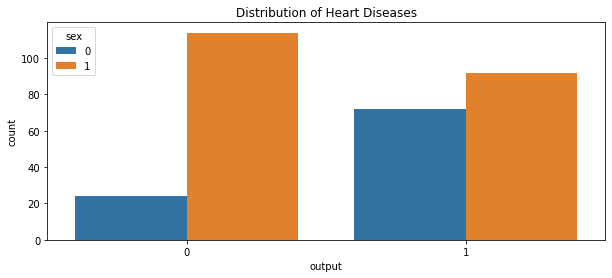

In [46]:
#to visualize distribution for heart diseases

fig,ax=plt.subplots(figsize=(10,4))
#countplot for Holiday and y
sns.countplot(x ='output', data = df , hue='sex' )
ax.set_title('Distribution of Heart Diseases')
plt.show()

<AxesSubplot:xlabel='output'>

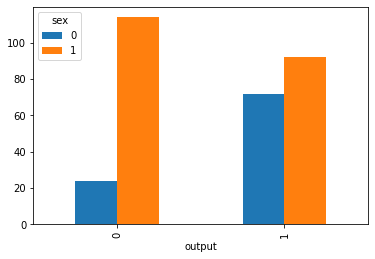

In [51]:
#to visualize the sex type likely to have heart disease

pd.crosstab(df.output, df.sex).plot(kind='bar')

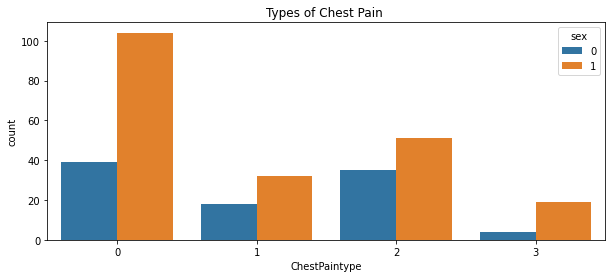

In [47]:
#Types of Chest Pain 
fig,ax=plt.subplots(figsize=(10,4))

#countplot for Holiday and y
sns.countplot(x ='ChestPaintype', data = df ,hue='sex')
ax.set_title('Types of Chest Pain ')
plt.show()

<AxesSubplot:title={'center':'Type of chest pain'}, xlabel='sex'>

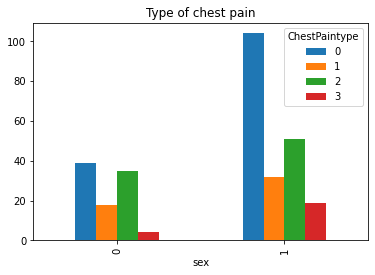

In [56]:
pd.crosstab(df.sex, df.ChestPaintype).plot(kind='bar', title ='Type of chest pain')

In [ ]:
#Distribution of Resting ECG

fig,ax=plt.subplots(figsize=(10,4))
#countplot for Holiday and y
sns.countplot(x ='restecg', data = df ,hue='sex')
ax.set_title('Distribution of Resting ECG')
plt.show()

<AxesSubplot:title={'center':'Distribution of Resting ECG'}, xlabel='sex'>

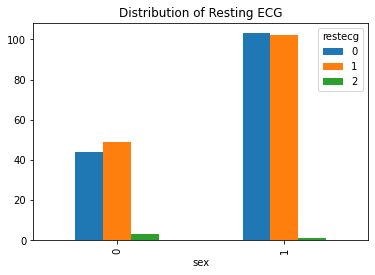

In [58]:
pd.crosstab( df.sex,df.restecg).plot(kind='bar', title ='Distribution of Resting ECG')

## <font color='5499C7'>ML model  </font> 



### Splitting the dataset into training and testing data

In [61]:
X=df.drop(['output'], axis=1)
Y=df['output']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 1. Logistic Regression

In [64]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 6 26]]
The accuracy of Logistic Regression is :  86.88524590163934 %


Text(69.0, 0.5, 'Truth')

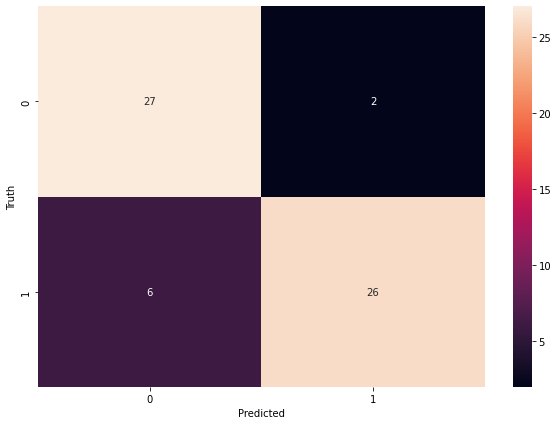

In [65]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 2- SVM

In [66]:
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)


print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[28  1]
 [ 4 28]]
The accuracy of SVM is :  91.80327868852459 %


Text(69.0, 0.5, 'Truth')

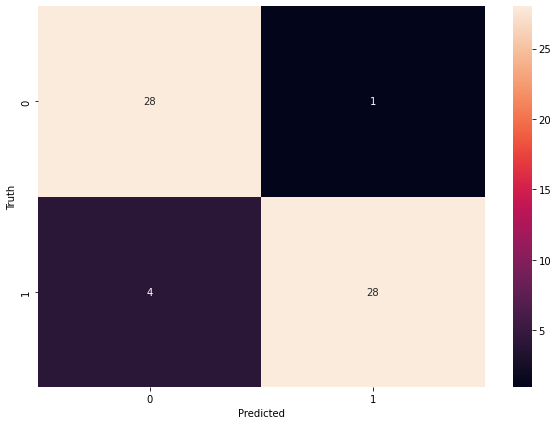

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 3-RandomForestClassifier

In [68]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 4 28]]
The accuracy of Random Forest is :  90.1639344262295 %


# 4-Confusion Matrix

Text(69.0, 0.5, 'Truth')

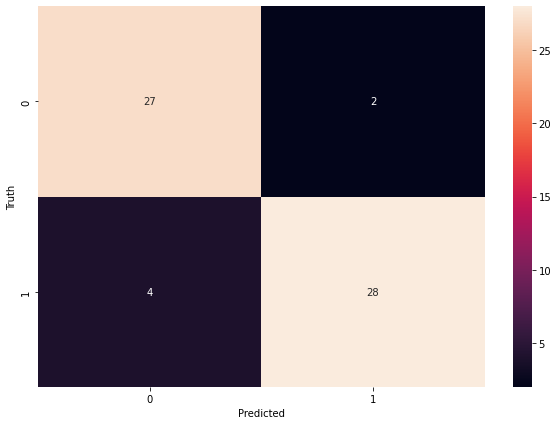

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Conclusion

1) SVM gives the best Accuracy compared to other models.

2) Major Vessels and Chest pain are major symptoms of heart attack.

3) Males are more susceptible to contracting heart diseases.

4) Feature selection increases the accuracy of the model.